# MNIST Number Recognition Notebook

## Install Necessary Libraries

In [ ]:
%pip install tensorflow-gpu pandas matplotlib

## Import Necessary Libraries

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Training data

In [2]:
train_df=pd.read_csv('data/mnist_train.csv',header=None)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(60000, 785)

In [5]:
train_df.isnull().sum().sum()

0

* The training dataset contains 60000 rows and 784 features and 1 label
* There are no null values
* 0 is the label column name 

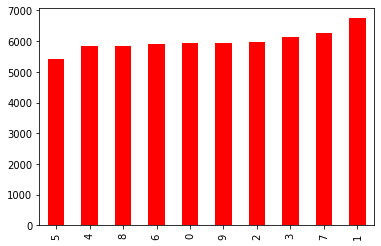

In [6]:
train_df[0].value_counts(ascending=True).plot.bar(color='red')

* Dataset labels are not biased

## Features & Labels split
## Scaling

In [7]:
X_train,y_train=train_df.drop(0,axis=1),train_df.iloc[:,0]

In [8]:
X_train = X_train/255

In [9]:
X_train=X_train.values

## Show image

In [10]:
def show_image(X:np.ndarray,y:int):
  plt.imshow(X.reshape(28,28))
  plt.title(f"Correct Label: {y}")
  return plt.show()

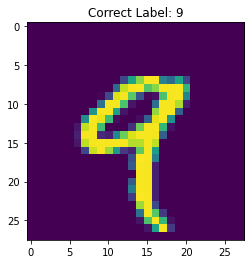

In [11]:
show_image(X_train[4],y_train[4])

## Artificial Neural Network Construction

In [12]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,ReLU,Flatten

In [13]:
classifier=Sequential([
                       Dense(128,input_shape=(784,),kernel_initializer = 'he_uniform',activation='relu'),
                       Dropout(0.2),
                       Dense(64,input_shape=(784,),kernel_initializer = 'he_uniform',activation='relu'),
                       Dropout(0.2),
                       Dense(10,kernel_initializer='glorot_uniform',activation='softmax')
])


#### Early Stopping monitors the generalization error of the model and stops training when generalization error begins to degrade.

In [14]:
classifier.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [15]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=100,callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 7s 3ms/step - loss: 0.3683 - accuracy: 0.8882 - val_loss: 0.1415 - val_accuracy: 0.9573
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1760 - accuracy: 0.9480 - val_loss: 0.1051 - val_accuracy: 0.9683
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1362 - accuracy: 0.9590 - val_loss: 0.1002 - val_accuracy: 0.9711
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1143 - accuracy: 0.9650 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1000 - accuracy: 0.9691 - val_loss: 0.0930 - val_accuracy: 0.9740
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0891 - accuracy: 0.9723 - val_loss: 0.0853 - val_accuracy: 0.9746
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0800 - accuracy: 0.9747 - val_loss: 0.0867 - val_ac

In [16]:
classifier.save('mnist_model.h5')

Thus the ANN classifier is trained and saved.

## Evaluate using Test Set

In [17]:
test_df=pd.read_csv('data/mnist_test.csv',header=None)

In [18]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_df.isnull().sum().sum()

0

* No Null Values Found

### Feature & labels split

In [20]:
X_test,y_test=test_df.drop(0,axis=1),test_df.iloc[:,0]

In [21]:
X_test.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
2242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_test.sample(5)

8635    8
2678    4
1004    1
2557    0
5012    6
Name: 0, dtype: int64

In [23]:
X_test=X_test/255
X_test=X_test.values

In [24]:
classifier.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9808


[0.08607009798288345, 0.9807999730110168]

## Our Model provides the accuracy of 98%

In [27]:
y_test_predicted=classifier.predict(X_test)

In [28]:
y_test_predicted_values=[np.argmax(i)for i in y_test_predicted]

In [29]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_test_predicted_values)

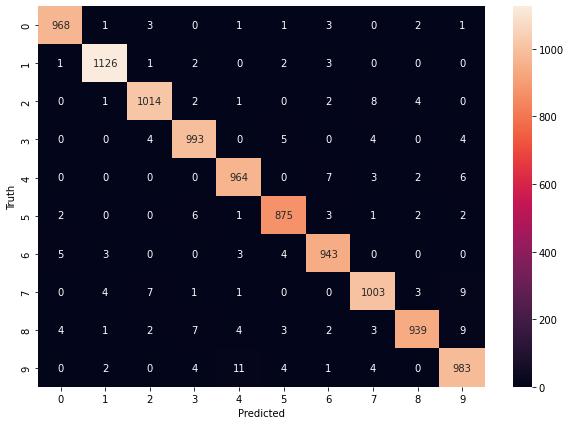

In [32]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()